In [1]:
import itertools
import numpy as np 
import os 
from PIL import Image
from sklearn.cluster import KMeans

from match_helpers import _calculate_match

In [2]:
test_image_path = "../public/42069069_715870422081244_3220977222890291200_n.jpg"

In [3]:
test_image = Image.open(test_image_path)
test_image = test_image.resize((256,256))

In [4]:
image_matrix = np.array(test_image)

In [5]:
color_array = image_matrix.reshape((-1, image_matrix.shape[-1]))

In [6]:
color_array

array([[191, 186, 164],
       [191, 186, 164],
       [196, 191, 169],
       ...,
       [156, 156, 146],
       [131, 130, 120],
       [ 77,  76,  67]], dtype=uint8)

In [7]:
k_means = KMeans(n_clusters=10).fit(color_array)

/home/jkoki/anaconda3/envs/colordb/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
k_means.labels_

array([8, 8, 8, ..., 7, 4, 5], dtype=int32)

In [9]:
labeled_color_array = np.column_stack([color_array, k_means.labels_])

In [10]:
def colored_square(r, g, b):
    cblock = f"\033[48:2::{int(r)}:{int(g)}:{int(b)}m \033[49m"
    csquare = ""
    for _ in range(5):
        csquare += (cblock*10) + "\n"
    return csquare

In [11]:
for label in set(k_means.labels_):
    mask = labeled_color_array[:,-1] == label
    mask_colors = labeled_color_array[mask][:, :-1].mean(0)
    avg_color = tuple(mask_colors)

    match_name = _calculate_match(avg_color)
    print(match_name)

    r, g, b = avg_color
    print(colored_square(r, g, b))

dark-brown-tangelo
[48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m 
[48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m 
[48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m 
[48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m 
[48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:78m [48:2::138:102:7

In [73]:
label_masks = []
for label in set(k_means.labels_):
    single_label_mask = np.zeros((256*256, 3))
    for i, row in enumerate(labeled_color_array):
        color = row[:-1]
        curr_label = row[-1]
        if label == curr_label:
            single_label_mask[i] = color

    mask_only = np.uint8(single_label_mask.reshape((256,256,3)))
    label_masks.append(Image.fromarray(mask_only))

In [74]:
for i, l in enumerate(label_masks):
    l.save(f"../public/{i}.jpg")

In [75]:
len(label_masks)

10

In [76]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

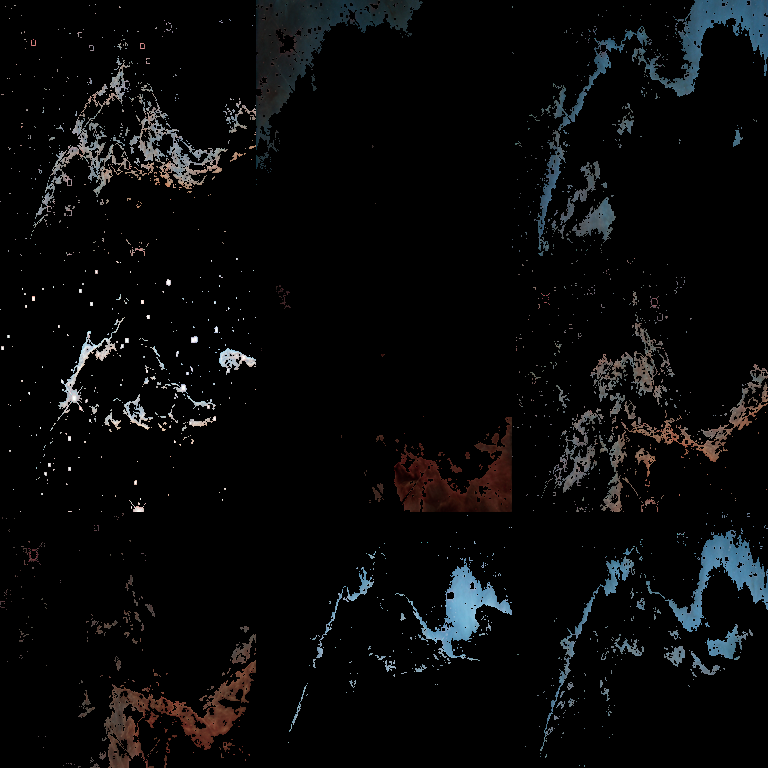

In [77]:
image_grid(label_masks[:-1], 3, 3)